In [1]:
# titanic predictions : 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train (1).csv')

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [8]:
df.size

10692

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.groupby(['Sex']).size()

Sex
female    314
male      577
dtype: int64

In [11]:
df.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [12]:
df.groupby(['Pclass','Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

In [13]:
df.iloc[:,[2,4]].value_counts()

Pclass  Sex   
3       male      347
        female    144
1       male      122
2       male      108
1       female     94
2       female     76
dtype: int64

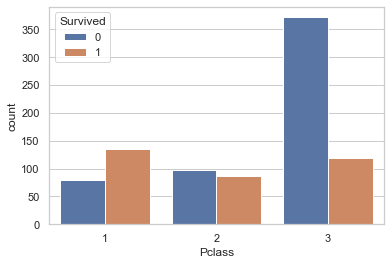

In [14]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='Pclass',  hue="Survived", data=df)

In [15]:
df1=df.loc[(df['Pclass']==1)].set_index(['PassengerId'])
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [16]:
df.groupby(['Embarked','Survived']).count()

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Embarked Survived                                                              
C        0                  75      75    75   75   51     75     75      75   
         1                  93      93    93   93   79     93     93      93   
Q        0                  47      47    47   47   20     47     47      47   
         1                  30      30    30   30    8     30     30      30   
S        0                 427     427   427  427  353    427    427     427   
         1                 217     217   217  217  201    217    217     217   

                   Fare  Cabin  
Embarked Survived               
C        0           75     17  
         1           93     52  
Q        0           47      2  
         1           30      2  
S        0          427     49  
         1          217     80

##### here we can conclude that about two third of the people who embarked on port Southampton(S) didnt survive which was a 1:1  death:survival ratio to other ports . 

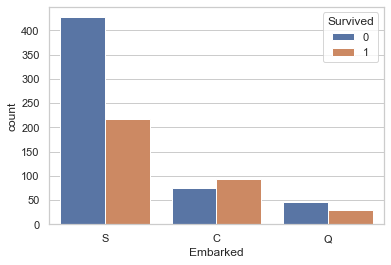

In [17]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='Embarked',  hue="Survived", data=df)

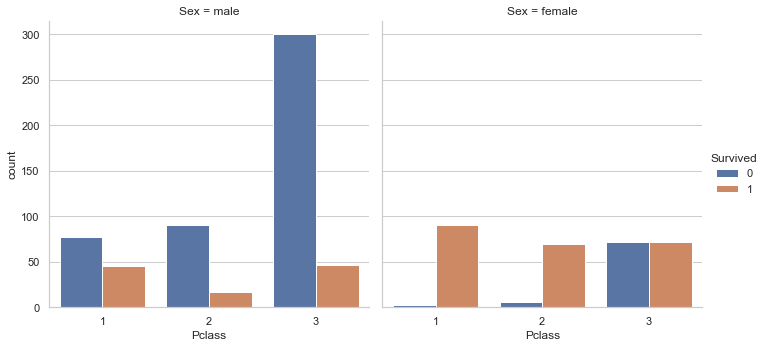

In [18]:
ax=sns.catplot(x='Pclass', hue='Survived', col = 'Sex', kind='count',data=df)


##### here we observe male deaths in class 3 is about 6 times those who survived from those males who survived from that class 




In [19]:
df_test=pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [20]:
df=df.replace({"Sex": {"male": 0, "female": 1},
               "Embarked": {"Q" : 0, "S": 1, "C": 2}})      

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2.0


In [22]:
df["Cabin"].value_counts().sum()

204

In [23]:
df['Cabin'].isna().sum()

687

In [24]:
#since this is an insignificant attribute we shall remove it 
X=df.drop(columns=['Ticket','Cabin','Name','PassengerId','Survived'])
Y=df.iloc[:,1].values

In [25]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1.0
1,1,1,38.0,1,0,71.2833,2.0
2,3,1,26.0,0,0,7.9250,1.0
3,1,1,35.0,1,0,53.1000,1.0
4,3,0,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,1.0
887,1,1,19.0,0,0,30.0000,1.0
888,3,1,NaN,1,2,23.4500,1.0
889,1,0,26.0,0,0,30.0000,2.0


In [26]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [27]:
X.dtypes

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

In [28]:
X_train=X.iloc[:,:].values

In [29]:
X.isna().count()

Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

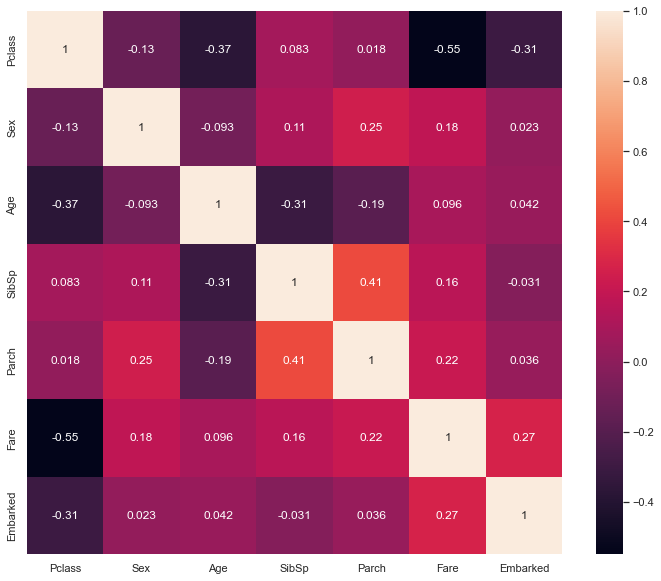

In [30]:
plt.figure(figsize=(12,10))
cor=X.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [31]:
X= X.astype({"Embarked": np.float16 , "Fare": np.float16 , "Age": np.float16})
X=X.astype({"Pclass":np.int16 , "Sex":np.int16 , "SibSp":np.int16 , "Parch":np.int16})

In [32]:
X.dtypes

Pclass        int16
Sex           int16
Age         float16
SibSp         int16
Parch         int16
Fare        float16
Embarked    float16
dtype: object

In [47]:
X['Age'].fillna(X['Age'].mean(),inplace=True)

In [48]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [38]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
df_test=df_test.replace({"Sex": {"male": 0, "female": 1},
               "Embarked": {"Q" : 0, "S": 1, "C": 2}})   
X_test=df_test.drop(columns=['Ticket','Cabin','Name','PassengerId'])

In [44]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,0
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,0
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,1
414,1,1,39.0,0,0,108.9000,2
415,3,0,38.5,0,0,7.2500,1
416,3,0,NaN,0,0,8.0500,1


In [52]:
X_test['Age'].fillna(X_test['Age'].mean(),inplace=True)

In [50]:
X_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,1.133971
std,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.580452
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [51]:
X.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,2.308642,0.352413,29.703125,0.523008,0.381594,32.187500,1.102539
std,0.836071,0.477990,13.007812,1.102743,0.806057,inf,0.515137
min,1.000000,0.000000,0.419922,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910156,1.000000
50%,3.000000,0.000000,29.687500,0.000000,0.000000,14.453125,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.500000,2.000000


In [56]:
X_test['Fare'].fillna(X_test['Fare'].mean(),inplace=True)

In [57]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,0
1,3,1,47.00000,1,0,7.0000,1
2,2,0,62.00000,0,0,9.6875,0
3,3,0,27.00000,0,0,8.6625,1
4,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,1
414,1,1,39.00000,0,0,108.9000,2
415,3,0,38.50000,0,0,7.2500,1
416,3,0,30.27259,0,0,8.0500,1


In [58]:
X_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [68]:
X.groupby(['Embarked']).count()

,Pclass,Sex,Age,SibSp,Parch,Fare
Embarked,,,,,,
0.0,77,77,77,77,77,77
1.0,644,644,644,644,644,644
2.0,168,168,168,168,168,168


In [69]:
# since median is 1.0 we shall go with it

In [70]:
X['Embarked'].fillna(1.0,inplace=True)

In [73]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X,Y)

GradientBoostingClassifier()

In [77]:
Y_pred=clf.predict(X_test)

In [78]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [79]:
sub=pd.read_csv('test.csv')
submission=pd.DataFrame({"PassengerId": sub["PassengerId"],"Survived":Y_pred})

In [80]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
submission.to_csv('submission.csv',index=False)